In [1]:
import pandas as pd


path = "./../../data/train/"

# Ml_item2attributes.json  directors.tsv  genres.tsv  titles.tsv  train_ratings.csv  writers.tsv  years.tsv

# Load data
titles = pd.read_csv(path + "titles.tsv", sep="\t")
years = pd.read_csv(path + "years.tsv", sep="\t")
genres = pd.read_csv(path + "genres.tsv", sep="\t")
directors = pd.read_csv(path + "directors.tsv", sep="\t")
writers = pd.read_csv(path + "writers.tsv", sep="\t")

# years에 년도 이미 있으니 없어도됨. 오로시뜸
titles['title'] = titles['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)

ratings = pd.read_csv(path + "train_ratings.csv")

# Merge data
movie_df = pd.merge(titles, years, on="item", how="left")
movie_df = pd.merge(movie_df, genres, on="item", how="left")
movie_df = pd.merge(movie_df, directors, on="item", how="left")
movie_df = pd.merge(movie_df, writers, on="item", how="left")

# 왜 결측치가 있지?
movie_df['genre'] = movie_df['genre'].fillna('')
movie_df['writer'] = movie_df['writer'].fillna('')

# genre, writer 합치기
movie_df = movie_df.groupby(['item', 'title', 'year', 'director']).agg({
	'genre': lambda x: ', '.join(set(x)),
	'writer': lambda x: ', '.join(set(x))
}).reset_index()


movie_df['year'] = movie_df['year'].astype(int)


print(movie_df.head())


   item                        title  year   director  \
0     1                    Toy Story  1995  nm0005124   
1     2                      Jumanji  1995  nm0002653   
2     3             Grumpier Old Men  1995  nm0222043   
3     4            Waiting to Exhale  1995  nm0001845   
4     5  Father of the Bride Part II  1995  nm0796124   

                                             genre  \
0  Fantasy, Adventure, Comedy, Animation, Children   
1                     Fantasy, Adventure, Children   
2                                  Comedy, Romance   
3                           Comedy, Romance, Drama   
4                                           Comedy   

                                              writer  
0  nm0230032, nm0004056, nm0923736, nm0710020, nm...  
1                    nm0378144, nm0852430, nm0885575  
2                                          nm0425756  
3                                          nm0060103  
4         nm0329304, nm0796124, nm0583600, nm0352443  


In [2]:
years_set = set(movie_df['year'])

years = dict()

for year in years_set:
    years[year] = 0

for i, row in movie_df.iterrows():
    if row['year'] in years:
        years[row['year']] += 1


print(years)

sorted_year = dict(sorted(years.items(), key=lambda item: item[1], reverse=True))
print("Top 10 years")
for key in list(sorted_year.keys())[:20]:
    print("year :",key,"  |   movies :", sorted_year[key])

{1922: 2, 1923: 3, 1924: 4, 1925: 6, 1926: 2, 1927: 5, 1928: 6, 1929: 2, 1930: 3, 1931: 10, 1932: 9, 1933: 12, 1934: 7, 1935: 9, 1936: 13, 1937: 15, 1938: 13, 1939: 31, 1940: 34, 1941: 21, 1942: 23, 1943: 11, 1944: 18, 1945: 21, 1946: 19, 1947: 17, 1948: 24, 1949: 24, 1950: 24, 1951: 21, 1952: 20, 1953: 30, 1954: 23, 1955: 37, 1956: 24, 1957: 26, 1958: 25, 1959: 29, 1960: 30, 1961: 26, 1962: 41, 1963: 27, 1964: 32, 1965: 31, 1966: 29, 1967: 34, 1968: 29, 1969: 26, 1970: 36, 1971: 35, 1972: 40, 1973: 38, 1974: 36, 1975: 32, 1976: 34, 1977: 45, 1978: 40, 1979: 46, 1980: 48, 1981: 59, 1982: 56, 1983: 55, 1984: 67, 1985: 78, 1986: 74, 1987: 84, 1988: 85, 1989: 88, 1990: 92, 1991: 92, 1992: 109, 1993: 116, 1994: 127, 1995: 145, 1996: 144, 1997: 139, 1998: 161, 1999: 163, 2000: 166, 2001: 190, 2002: 202, 2003: 196, 2004: 194, 2005: 207, 2006: 237, 2007: 212, 2008: 194, 2009: 193, 2010: 169, 2011: 158, 2012: 117, 2013: 106, 2014: 66}
Top 10 years
year : 2006   |   movies : 237
year : 2007   |

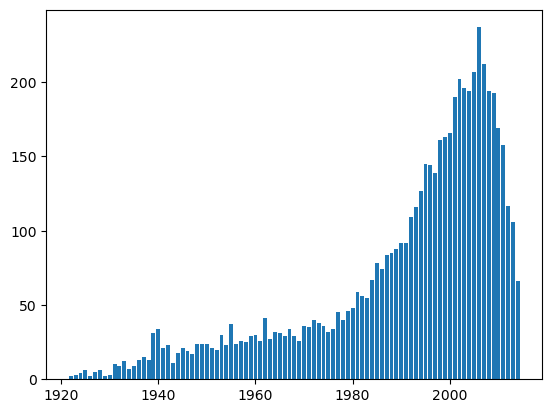

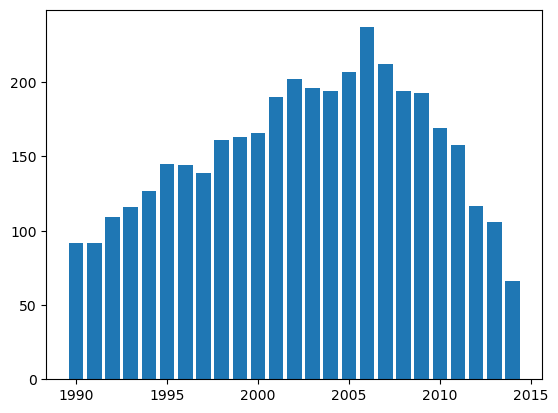

In [3]:
import matplotlib.pyplot as plt

plt.bar(years.keys(), years.values())
plt.show()

years_after_1990 = dict()
for key in years.keys():
    if key >= 1990:
        years_after_1990[key] = years[key]
plt.bar(years_after_1990.keys(), years_after_1990.values())
plt.show()

In [4]:
movie_df['year'].max()

2014

In [4]:
from difflib import SequenceMatcher


movie_series_title_list = ['Harry Potter', 'Star Trek', 'Star Wars', 'The Lord of the Rings', 'Avengers']

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def series_similarity(movie_series_title):
    series_movie = movie_df[movie_df['title'].str.contains(movie_series_title)]
    print(series_movie['title'])

    # Calculate similarity scores
    similarity_scores = []
    titles = series_movie['title'].tolist()

    for i in range(len(titles)):
        for j in range(i + 1, len(titles)):
            score = similar(titles[i], titles[j])
            similarity_scores.append((titles[i], titles[j], score))

    # Print similarity scores
    for title1, title2, score in similarity_scores:
        print(f"Similarity between '{title1}' and '{title2}': {score:.2f}")

for title in movie_series_title_list:
    series_similarity(title)

2460    Harry Potter and the Sorcerer's Stone (a.k.a. ...
2779              Harry Potter and the Chamber of Secrets
3587             Harry Potter and the Prisoner of Azkaban
4295                  Harry Potter and the Goblet of Fire
4704            Harry Potter and the Order of the Phoenix
5118               Harry Potter and the Half-Blood Prince
5385         Harry Potter and the Deathly Hallows: Part 1
5500         Harry Potter and the Deathly Hallows: Part 2
Name: title, dtype: object
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Chamber of Secrets': 0.46
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Prisoner of Azkaban': 0.43
Similarity between 'Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone)' and 'Harry Potter and the Goblet of Fire': 0.41
Similarity between 'Harry Pot

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!주의!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#  이거 한번 돌리는데 10분걸림. 파일로 저장해뒀으니 거기로 우회해서 사용하셈

# 대충 유사도 0.8 이상인 영화 추출하기
# 세상에 해리포터 1,2,4,5편을 봤는데 3편안본사람이 설마 있을까 싶어서
# 시리즈 담아둔 다음 다른 유저들이 3편 본 비율이 90% 넘으면 추천해주는거 있으면 조금 더 정교해지지 않을까 싶어서 일단 해봄

similarity_threshold = 0.8
similar_titles = []

titles = movie_df['title'].tolist()

for i in range(len(titles)):
    for j in range(i + 1, len(titles)):
        score = similar(titles[i], titles[j])
        if score > similarity_threshold:
            similar_titles.append((titles[i], titles[j], score))

print(similar_titles)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!주의!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import os
import csv

path = './data/eda/'
if not os.path.exists(path):
    os.makedirs(path)

with open(path + 'similar_titles.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['title1', 'title2', 'similarity'])
    for row in similar_titles:
        writer.writerow(row)

[('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 2', 0.9), ('Toy Story', 'Toy Story 3', 0.9), ('Grumpier Old Men', 'Grumpy Old Men', 0.8666666666666667), ('Father of the Bride Part II', 'Father of the Bride', 0.8260869565217391), ('Father of the Bride Part II', 'Father of the Bride', 0.8260869565217391), ('Sabrina', 'Sabrina', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('Four Rooms', 'Four Rooms', 1.0), ('City of Lost Children, The (Cité des enfants perdus, La)', 'City of Lost Children, The (Cité des enfants perdus, La)', 1.0), ('Babe', 'Babel', 0.8888888888888888), ('Richard III', 'Richard III', 1.0), ('Dead Presidents', 'Dead Presidents', 1.0), ('Pocahontas', 'Pocahontas', 1.0), ('Friday', 'Frida', 0.9090909090909091), ('Kicking and Screaming', 'Kicking & Screaming', 0.9), ('Misérables, Les', 'Misérables, Les', 1.0), ('Misérables, Les', 'Misérables, Les', 1.0), ('Muppet Treasure Island', 'Treasure Island'

In [7]:
print(len(similar_titles))

series_list = []

for title1, title2, score in similar_titles:
    if score < 1.0:
        match = SequenceMatcher(None, title1, title2).find_longest_match(0, len(title1), 0, len(title2))
        common_substring = title1[match.a: match.a + match.size]
        
        if len(common_substring) > 8:  # 수정하면되는 부분. 8인 이유는 토이스토리가 8이기때문
            series_list.append(common_substring)

print(set(series_list))
print(len(set(series_list)))

# 이거중 쓸만한 것들 한번 쭉 읽어보고 가면 될듯?

1313
{'ive by Night', 'Into the W', 'Waiting for ', 'Cheaper by the Dozen', ' Man, The', 'Transporter ', 'Man Who Knew Too ', ' (Trois couleurs: ', 'an of the Year', 'Treasure Island', 'Invisible', 'How to Train Your Dragon', 'Man with the Golden ', 's of Heaven', 'Nymphomaniac: Volume I', 'Father of the Bride', 'American M', 'Gods Must Be Crazy', 'Bad News Bears', 'Metropoli', 'Karate Kid, Part II', ' Furious (Fast and the Furious ', 'ride & Prejudice', 'Adventures of ', 'American Dream', 'Replacement', 'Friday the 13th Part ', "Look Who's Talking", ' Line, The', 'ator, The', 'Jungle Book', ' Yards, The', 'Dark Knight', 'Deep Blue', ' Musketeers, The', ' One, The', ' Prejudice', 'Superman II', 'Godfather: Part II', 'High School Musical', ' Under the Influence, A', 'Little Princess, ', 'Paranormal Activity ', 'Resident Evil: ', 'Lethal Weapon', 'ighter, The', 'Perfect S', ' Dalmatians', "e O'Clock High", 'Flight of the Phoenix', 'Expendables', 'Castle, The', 'Major League', 'Jeepers Cr

In [5]:
movie_audience = {}
users = {}

for i, row in ratings.iterrows():
    user = row['user']
    movie = row['item']
    if user not in users:
        users[user] = []
    if movie not in movie_audience:
        movie_audience[movie] = 0
    movie_audience[movie] += 1
    users[user].append(movie)

directors = {}
for i, row in movie_df.iterrows():
    director = row['director']
    if director not in directors:
        directors[director] = []
    directors[director].append(row['item'])
    


max user count :  2912
min user count :  16
mean user count :  164.36450892857144


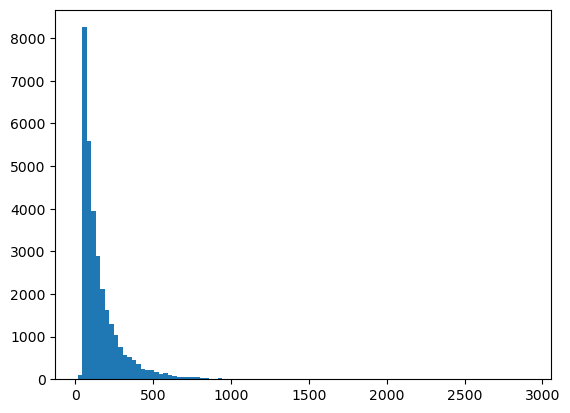

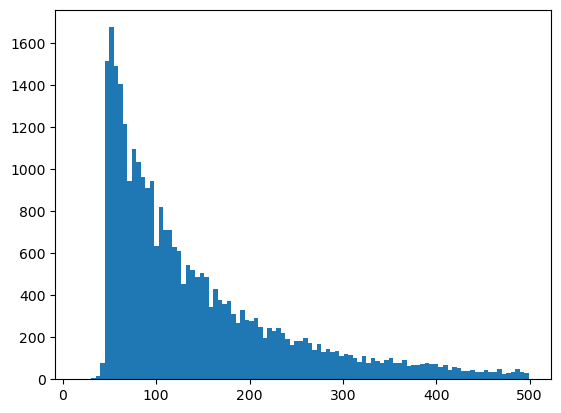

In [6]:
user_count = {}

for user, movies in users.items():
    user_count[user] = len(movies)
    
print("max user count : ", max(user_count.values()))
print("min user count : ", min(user_count.values()))
print("mean user count : ", sum(user_count.values()) / len(user_count))

plt.hist(user_count.values(), bins=100)
plt.show()

user_count_amputated = {k: v for k, v in user_count.items() if v < 500}
plt.hist(user_count_amputated.values(), bins=100)
plt.show()


In [7]:
print(len(user_count))

31360


max movie audience :  19699
min movie audience :  27
mean movie audience :  757.2309387395328
top 10 movies
movie : Matrix, The   |   audience : 19699
movie : Fight Club   |   audience : 18437
movie : Pulp Fiction   |   audience : 18202
movie : Shawshank Redemption, The   |   audience : 18168
movie : Forrest Gump   |   audience : 17339
movie : Lord of the Rings: The Fellowship of the Ring, The   |   audience : 17237
movie : Lord of the Rings: The Return of the King, The   |   audience : 16656
movie : Lord of the Rings: The Two Towers, The   |   audience : 16387
movie : Silence of the Lambs, The   |   audience : 15847
movie : American Beauty   |   audience : 15213


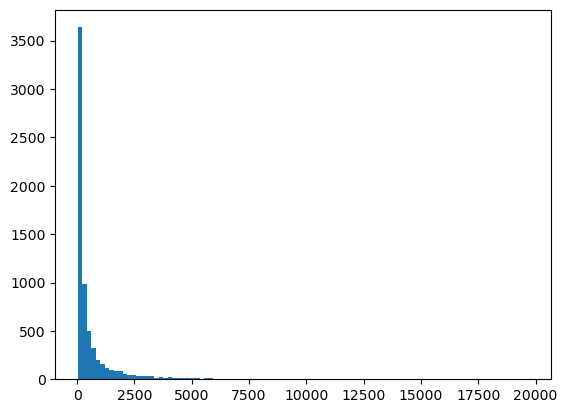

masterpiece movies
movie : Matrix, The   |   audience : 19699
movie : Fight Club   |   audience : 18437
movie : Pulp Fiction   |   audience : 18202
movie : Shawshank Redemption, The   |   audience : 18168
movie : Forrest Gump   |   audience : 17339
movie : Lord of the Rings: The Fellowship of the Ring, The   |   audience : 17237
movie : Lord of the Rings: The Return of the King, The   |   audience : 16656
movie : Lord of the Rings: The Two Towers, The   |   audience : 16387
movie : Silence of the Lambs, The   |   audience : 15847
movie : American Beauty   |   audience : 15213
movie : Memento   |   audience : 14726
movie : Star Wars: Episode IV - A New Hope   |   audience : 14613
movie : Star Wars: Episode V - The Empire Strikes Back   |   audience : 14401
movie : Sixth Sense, The   |   audience : 14291
movie : Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark)   |   audience : 14224
movie : Seven (a.k.a. Se7en)   |   audience : 13857
movie : Usual Suspects, The   |

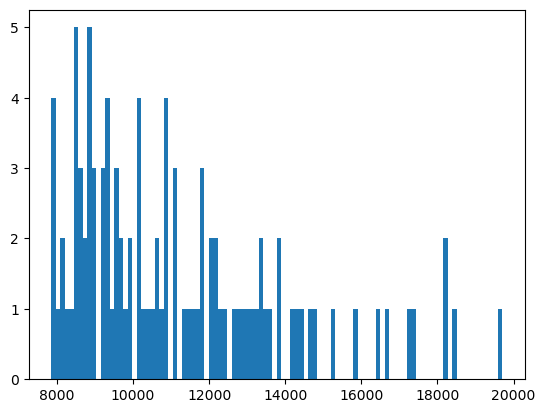

In [8]:
print("max movie audience : ", max(movie_audience.values()))
print("min movie audience : ", min(movie_audience.values()))
print("mean movie audience : ", sum(movie_audience.values()) / len(movie_audience))

movie_audience = {k: v for k, v in sorted(movie_audience.items(), key=lambda item: item[1], reverse=True)}
print("top 10 movies")
for key in list(movie_audience.keys())[:10]:
    title = movie_df[movie_df['item'] == key]
    print("movie :", title["title"].values[0],"  |   audience :", movie_audience[key])
plt.hist(movie_audience.values(), bins=100)
plt.show()

movie_audience_masterpiece = {k: v for k, v in movie_audience.items() if v > len(user_count)/4}
print("masterpiece movies")
for key in movie_audience_masterpiece.keys():
    title = movie_df[movie_df['item'] == key]
    print("movie :", title["title"].values[0],"  |   audience :", movie_audience_masterpiece[key])

print("The number of MAM :", len(movie_audience_masterpiece))
plt.hist(movie_audience_masterpiece.values(), bins=100)
plt.show()

# 이후 할거 : 명'감독' 따로 분류해놓기, 장르 분석?

max director count :  44
min director count :  2
mean director count :  4.405526512322629


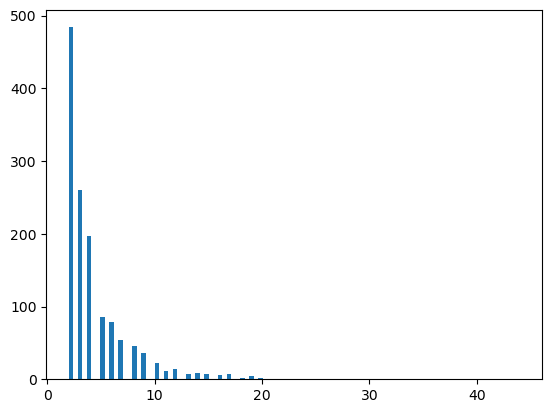

In [9]:
director_count = {}
director_audience = {}

for director, movies in directors.items():
    director_count[director] = len(movies)
    director_audience[director] = sum([movie_audience[movie] for movie in movies])

print("max director count : ", max(director_count.values()))
print("min director count : ", min(director_count.values()))
print("mean director count : ", sum(director_count.values()) / len(director_count))

plt.hist(director_count.values(), bins=100)
plt.show()



max genre count :  3019
min genre count :  92
mean genre count :  791.6666666666666
-------------------- genre count --------------------
Thriller  :  1302
Horror  :  480
Crime  :  845
Fantasy  :  531
Romance  :  1108
Western  :  133
Sci-Fi  :  574
Musical  :  298
Adventure  :  841
Documentary  :  205
Action  :  1155
Film-Noir  :  92
Comedy  :  2056
Animation  :  416
Children  :  476
War  :  313
Mystery  :  406
Drama  :  3019
-------------------- genre audience --------------------
max genre audience :  2500984
min genre audience :  66961
mean genre audience :  855972.3333333334
-------------------- specific genre audience --------------------
Thriller  :  1467584
Horror  :  334073
Crime  :  1072001
Fantasy  :  761561
Romance  :  935953
Western  :  97351
Sci-Fi  :  877667
Musical  :  334660
Adventure  :  1382099
Documentary  :  66961
Action  :  1575300
Film-Noir  :  93699
Comedy  :  1833202
Animation  :  605326
Children  :  646544
War  :  322006
Mystery  :  500531
Drama  :  2500984


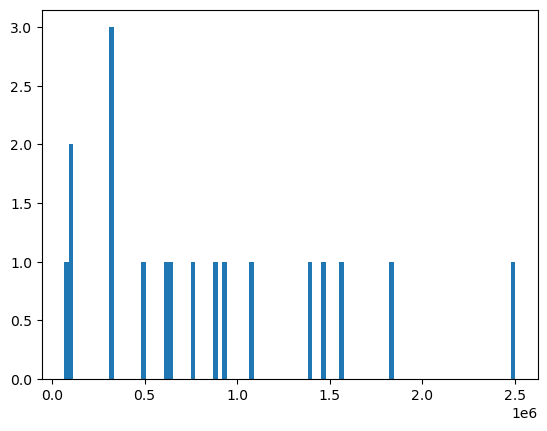

In [10]:
genres = set()
for i, row in movie_df.iterrows():
    genres.update(row['genre'].split(", "))

genre_count = {genre: 0 for genre in genres}
genre_audience = {genre: 0 for genre in genres}

for i, row in movie_df.iterrows():
    for genre in row['genre'].split(", "):
        genre_count[genre] += 1
        genre_audience[genre] += movie_audience[row['item']]

print("max genre count : ", max(genre_count.values()))
print("min genre count : ", min(genre_count.values()))
print("mean genre count : ", sum(genre_count.values()) / len(genre_count))

print("-------------------- genre count --------------------")

for key in genre_count.keys():
    print(key, " : ", genre_count[key])

print("-------------------- genre audience --------------------")

print("max genre audience : ", max(genre_audience.values()))
print("min genre audience : ", min(genre_audience.values()))
print("mean genre audience : ", sum(genre_audience.values()) / len(genre_audience))

print("-------------------- specific genre audience --------------------")

for key in genre_audience.keys():
    print(key, " : ", genre_audience[key])

plt.hist(genre_audience.values(), bins=100)
plt.show()



In [11]:
for key in movie_audience_masterpiece.keys():
    title = movie_df[movie_df['item'] == key]
    print("movie :", title["title"].values[0],"  |   audience :", movie_audience_masterpiece[key], "  |   genre :", title["genre"].values[0])

genre_count_masterpiece = {genre: 0 for genre in genres}
genre_audience_masterpiece = {genre: 0 for genre in genres}

for key in movie_audience_masterpiece.keys():
    title = movie_df[movie_df['item'] == key]
    for genre in title['genre'].values[0].split(", "):
        genre_count_masterpiece[genre] += 1
        genre_audience_masterpiece[genre] += movie_audience_masterpiece[key]

print("-------------------- masterpiece genre count --------------------")

for key in genre_count_masterpiece.keys():
    print(key, " : ", genre_count_masterpiece[key])

print("-------------------- masterpiece genre audience --------------------")

print("max masterpiece genre audience : ", max(genre_audience_masterpiece.values()))
print("min masterpiece genre audience : ", min(genre_audience_masterpiece.values()))
print("mean masterpiece genre audience : ", sum(genre_audience_masterpiece.values()) / len(genre_audience_masterpiece))

print("-------------------- masterpiece specific genre audience --------------------")

for key in genre_audience_masterpiece.keys():
    print(key, " : ", genre_audience_masterpiece[key])

movie : Matrix, The   |   audience : 19699   |   genre : Sci-Fi, Thriller, Action
movie : Fight Club   |   audience : 18437   |   genre : Thriller, Crime, Action, Drama
movie : Pulp Fiction   |   audience : 18202   |   genre : Thriller, Crime, Comedy, Drama
movie : Shawshank Redemption, The   |   audience : 18168   |   genre : Crime, Drama
movie : Forrest Gump   |   audience : 17339   |   genre : War, Comedy, Romance, Drama
movie : Lord of the Rings: The Fellowship of the Ring, The   |   audience : 17237   |   genre : Fantasy, Adventure
movie : Lord of the Rings: The Return of the King, The   |   audience : 16656   |   genre : Fantasy, Adventure, Action, Drama
movie : Lord of the Rings: The Two Towers, The   |   audience : 16387   |   genre : Fantasy, Adventure
movie : Silence of the Lambs, The   |   audience : 15847   |   genre : Thriller, Horror, Crime
movie : American Beauty   |   audience : 15213   |   genre : Comedy, Drama
movie : Memento   |   audience : 14726   |   genre : Thril

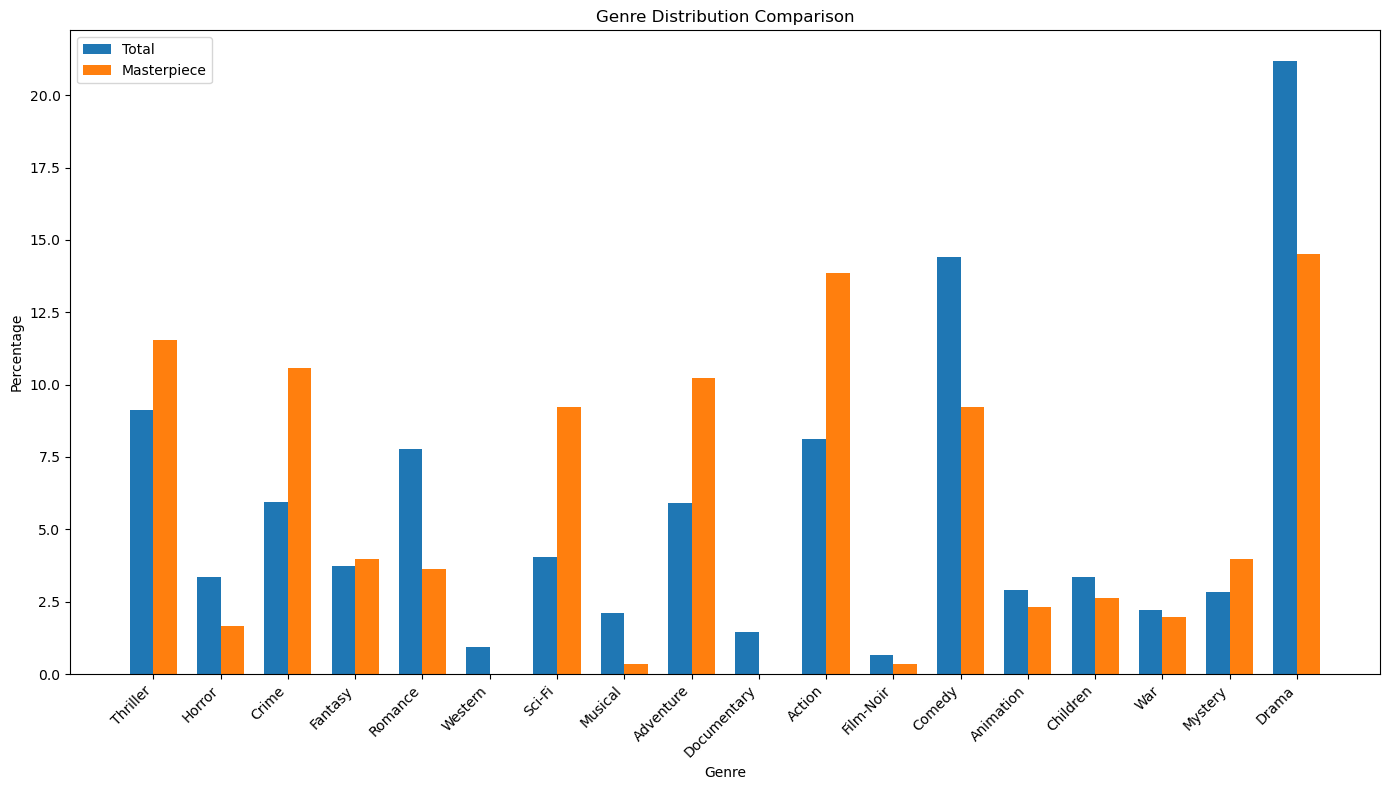

In [12]:
import numpy as np

total_genre_percentage = {genre: (count / sum(genre_count.values())) * 100 for genre, count in genre_count.items()}
masterpiece_genre_percentage = {genre: (count / sum(genre_count_masterpiece.values())) * 100 for genre, count in genre_count_masterpiece.items()}

genres = list(total_genre_percentage.keys())
total_percentage = list(total_genre_percentage.values())
masterpiece_percentage = list(masterpiece_genre_percentage.values())

x = np.arange(len(genres))  
width = 0.35  

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, total_percentage, width, label='Total')
rects2 = ax.bar(x + width/2, masterpiece_percentage, width, label='Masterpiece')

ax.set_xlabel('Genre')
ax.set_ylabel('Percentage')
ax.set_title('Genre Distribution Comparison')
ax.set_xticks(x)
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()

In [13]:
from collections import Counter

masterpiece_directors = []

for movie in movie_audience_masterpiece.keys():
    director = movie_df[movie_df['item'] == movie]['director'].values[0]
    masterpiece_directors.append(director)

masterpiece_director_count = Counter(masterpiece_directors)

print("Directors with more than one masterpiece:")
for director, count in masterpiece_director_count.items():
    if count > 1:
        print(f"\nDirector: {director}, Count: {count}")
        movies = directors[director]
        for movie in movies:
            title = movie_df[movie_df['item'] == movie]['title'].values[0]
            print(f" - {title}")



Directors with more than one masterpiece:

Director: nm0000399, Count: 2
 - Seven (a.k.a. Se7en)
 - Alien³ (a.k.a. Alien 3)
 - Game, The
 - Fight Club
 - Panic Room
 - Zodiac
 - Curious Case of Benjamin Button, The
 - Social Network, The
 - Girl with the Dragon Tattoo, The
 - Gone Girl

Director: nm0000233, Count: 5
 - Four Rooms
 - Pulp Fiction
 - Reservoir Dogs
 - Jackie Brown
 - Kill Bill: Vol. 1
 - Kill Bill: Vol. 2
 - Sin City
 - Grindhouse
 - Death Proof
 - Inglourious Basterds
 - Django Unchained

Director: nm0001104, Count: 2
 - Shawshank Redemption, The
 - Green Mile, The
 - Majestic, The
 - Mist, The

Director: nm0000709, Count: 2
 - Forrest Gump
 - Back to the Future
 - Contact
 - Back to the Future Part II
 - Back to the Future Part III
 - Romancing the Stone
 - Who Framed Roger Rabbit?
 - Death Becomes Her
 - What Lies Beneath
 - Cast Away
 - Used Cars
 - Polar Express, The
 - Beowulf
 - Christmas Carol, A
 - Flight

Director: nm0001392, Count: 3
 - Heavenly Creatures
 - F

In [18]:
def analyze_user_genre_relationship(top_n_users):
    top_users = dict(sorted(user_count.items(), key=lambda item: item[1], reverse=True)[:top_n_users])
    top_users_movies = {user: users[user] for user in top_users.keys()}

    user_genre_count = {genre: 0 for genre in genres}

    for user, movies in top_users_movies.items():
        for movie in movies:
            movie_genres = movie_df[movie_df['item'] == movie]['genre'].values
            if len(movie_genres) > 0:
                movie_genres = movie_genres[0].split(", ")
                for genre in movie_genres:
                    user_genre_count[genre] += 1

    print(f"-------------------- Top {top_n_users} Users Genre Count --------------------")
    for key in user_genre_count.keys():
        print(key, " : ", user_genre_count[key])


    plt.hist(user_genre_count.values(), bins=100)
    plt.show()


-----------------Top 30 Users-----------------


-------------------- Top 30 Users Genre Count --------------------
Thriller  :  10978
Horror  :  3502
Crime  :  7401
Fantasy  :  3684
Romance  :  7903
Western  :  1264
Sci-Fi  :  4731
Musical  :  1891
Adventure  :  6571
Documentary  :  949
Action  :  8824
Film-Noir  :  1045
Comedy  :  13569
Animation  :  2163
Children  :  2473
War  :  2700
Mystery  :  3937
Drama  :  24152


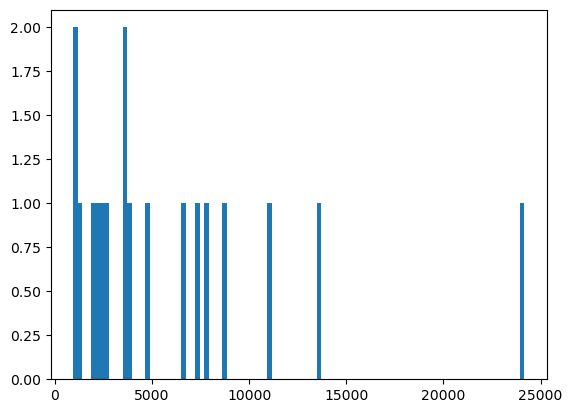

-----------------Top 50 Users-----------------
-------------------- Top 50 Users Genre Count --------------------
Thriller  :  17092
Horror  :  5158
Crime  :  11491
Fantasy  :  5710
Romance  :  11784
Western  :  1917
Sci-Fi  :  7619
Musical  :  2791
Adventure  :  10546
Documentary  :  1422
Action  :  14229
Film-Noir  :  1487
Comedy  :  20872
Animation  :  3269
Children  :  3828
War  :  4027
Mystery  :  5947
Drama  :  36126


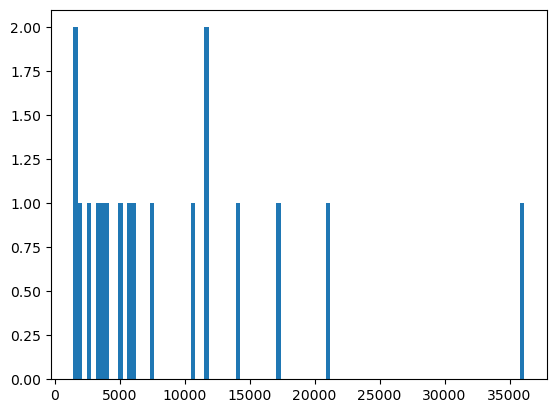

-----------------Top 100 Users-----------------
-------------------- Top 100 Users Genre Count --------------------
Thriller  :  29750
Horror  :  8854
Crime  :  20037
Fantasy  :  10698
Romance  :  20528
Western  :  3295
Sci-Fi  :  14179
Musical  :  4956
Adventure  :  19967
Documentary  :  2453
Action  :  26421
Film-Noir  :  2373
Comedy  :  38175
Animation  :  6215
Children  :  7113
War  :  7148
Mystery  :  10272
Drama  :  62300


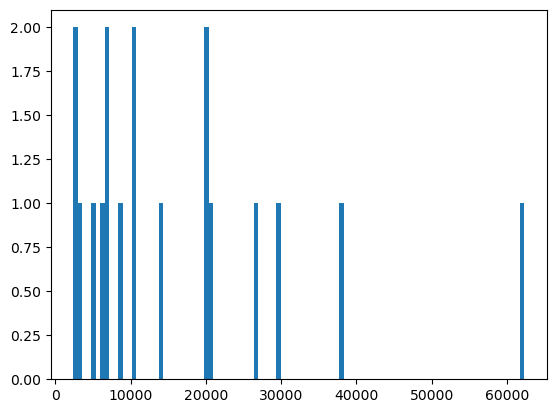

In [19]:
print("-----------------Top 30 Users-----------------")
analyze_user_genre_relationship(30)
print("-----------------Top 50 Users-----------------")
analyze_user_genre_relationship(50)
print("-----------------Top 100 Users-----------------")
analyze_user_genre_relationship(100)

In [ ]:
import sqlite3
import pandas as pd

# 데이터베이스 연결
conn = sqlite3.connect('movies.db')

# 데이터프레임을 데이터베이스에 저장
movie_df.to_sql('movies', conn, if_exists='replace', index=False)
ratings.to_sql('ratings', conn, if_exists='replace', index=False)

# 쿼리 실행 예시
query = """
SELECT m.title, COUNT(r.user) as audience
FROM movies m
JOIN ratings r ON m.item = r.item
GROUP BY m.item
ORDER BY audience DESC
LIMIT 10
"""
top_movies = pd.read_sql_query(query, conn)
print(top_movies)

# 데이터베이스 연결 종료
conn.close()


KeyboardInterrupt: 

In [21]:
ratings.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# 사용자별 장르 시청 횟수 계산
user_genre_count = {user: {genre: 0 for genre in genres} for user in users.keys()}

for user, movies in users.items():
    for movie in movies:
        movie_genres = movie_df[movie_df['item'] == movie]['genre'].values
        if len(movie_genres) > 0:
            movie_genres = movie_genres[0].split(", ")
            for genre in movie_genres:
                user_genre_count[user][genre] += 1

# 사용자별 장르 시청 횟수를 데이터프레임으로 변환
user_genre_df = pd.DataFrame.from_dict(user_genre_count, orient='index')

# 데이터 정규화
scaler = StandardScaler()
user_genre_scaled = scaler.fit_transform(user_genre_df)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = kmeans.fit_predict(user_genre_scaled)

# 클러스터링 결과를 데이터프레임에 추가
user_genre_df['cluster'] = user_clusters

print(user_genre_df.head())

    Thriller  Horror  Crime  Fantasy  Romance  Western  Sci-Fi  Musical  \
11       116      46     32       56       41        1     148       10   
14        10       0      9       34       51        3      22       17   
18         8       2     18        3       25        4       2        2   
25        16       6     21       13       17        1       8        2   
31        35       6     12       45       10        6      48        0   

    Adventure  Documentary  Action  Film-Noir  Comedy  Animation  Children  \
11        117            3     147          1      86         44        48   
14         55            0      22          0      96         38        53   
18          3            1       3          1      25          1         1   
25         20            0      21          0      39          5         9   
31         89            2      87          0      44         29        40   

    War  Mystery  Drama  cluster  
11   12       21    107        0  
14    5   

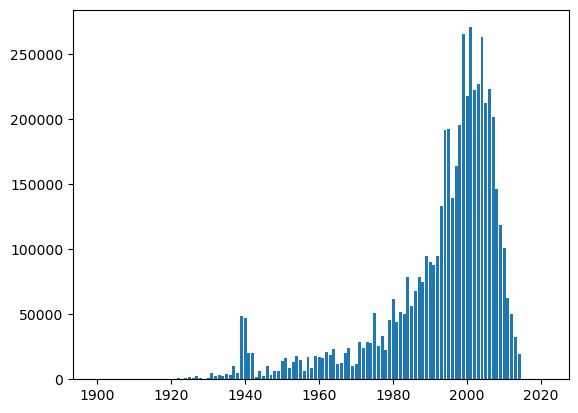

In [ ]:

movie_years = pd.read_csv(path + "years.tsv", sep="\t")

movie_audience_year = {year: 0 for year in range(1920, 2014)}

for i, row in movie_df.iterrows():
    movie = row['item']
    audience = movie_audience[movie]
    year = movie_years[movie_years['item'] == movie]['year'].values[0]
    movie_audience_year[year] += audience

plt.bar(movie_audience_year.keys(), movie_audience_year.values())

plt.show()